# TP 4 - Simulations de lois à densité

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

## Exercice 1

Soient $a$ et $b$ deux réels avec $a<b$. On rappelle que si $U \hookrightarrow \mathscr{U}([0,1])$, alors on a 
    $$(b-a) U+a \hookrightarrow \mathscr{U}([a, b]).$$
Écrire une fonction $\verb|uniforme(a,b)|$ simulant la loi $\mathscr{U}([a, b])$ à l'aide de la fonction ${\tt rd.rand()}$ uniquement.

#### Solution

In [2]:
def uniforme(a,b):
    return((b-a)*rd.rand()+a)

## Exercice 2

Écrire une fonction ${\tt normale(m,s)}$ simulant la loi $\mathscr{N}\left(m, s^{2}\right)$ à partir de la fonction ${\tt rd.normal()}$.

#### Solution

In [3]:
def normale(m,s):
    return(s*rd.normal()+m)

## Exercice 4

1. Rappeler l'expression de la fonction de répartition d'une loi exponentielle, et montrer qu'elle réalise une bijection de $\mathbb{R}_{+}^{*}$ sur $] 0,1[$. Déterminer sa bijection réciproque.
2. Écrire une fonction ${\tt exponentielle(lamb)}$ simulant une loi $\mathscr{E}(\lambda)$ à partir de la fonction ${\tt rd.rand()}$.
3. Écrire la fonction ${\tt Exponentielle(lamb,N)}$ donnant un échantillon de taille $N$ de la loi $\mathscr{E}(\lambda)$.
4. Créer un tableau de taille 10 000 contenant 10 000 simulations d'une variable aléatoire suivant la loi $\mathscr{E}(1/2)$.
5. En utilisant les commandes ${\tt np.mean}$ et ${\tt np.var}$, vérifier que la moyenne et l'écart-type sont bien conformes à ce qu'on attend.

#### Solution

In [4]:
#2.
def exponentielle(lamb):
    return(-np.log(1-rd.rand())/lamb)

In [5]:
#3.
def Exponentielle(lamb,N):
    return np.array([exponentielle(lamb) for i in range(N)])

In [6]:
#4.
lamb=0.5
N=10000
T=Exponentielle(lamb,N)

In [7]:
#5.
print("Moyenne de l'échantillon :", np.mean(T))
print("Variance de l'échantillon :", np.var(T))

Moyenne de l'échantillon : 2.0167401744244997
Variance de l'échantillon : 4.154285925928793


## Exercice 5

On rappelle que $X$ suit la loi de Cauchy si elle admet pour fonction de répartition 
	$$F : x \mapsto \frac 1 \pi \left(\arctan (x) + \frac \pi 2\right),$$
et donc de densité $f : t\mapsto \dfrac 1 \pi \dfrac{1}{1+t^2}$.
1. Montrer que $F$ réalise une bijection sur $\mathbb{R}$, et déterminer $F^{-1}$.

    2.a. \'Ecrire une fonction ${\tt cauchy()}$ qui simule la loi de Cauchy, à partit de la fonction ${\tt rd.rand()}$.
    
    2.b. \'Ecrire une fonction ${\tt Cauchy(N)}$ qui donne un échantillon de taille ${\tt N}$ de la loi de Cauchy.


3. Créer un tableau contenant $10\;000$ simulations de la loi de Cauchy, et déterminer sa moyenne. Recommencer avec plusieurs échantillons. Qu'en déduire sur l'espérance de la loi de Cauchy ?

#### Solution

In [8]:
#2a.
def cauchy():
    return(np.tan(np.pi*(rd.rand()-0.5)))

In [9]:
#2b.
def Cauchy(N):
    return(np.array([cauchy() for i in range(N)]))

In [10]:
#3.
N=10000
T=Cauchy(N)
np.mean(T)

4.612872455407324

In [11]:
Moyenne=np.array([np.mean(Cauchy(N)) for i in range(100)])

In [12]:
(np.min(Moyenne), np.max(Moyenne))

(-93.05714405801841, 1493.6234781055232)

## Exercice 6

 1. Simuler avec la fonction ${\tt Exponentielle}$ $N=10\;000$ valeurs de la loi $\mathscr{E}(0.5)$.
 2. Tracer la courbe représentative de la densité $f$ de la loi $\mathscr{E}(0.5)$.
 3. Tracer l'histogramme des fréquences de l'échantillon obtenu (on prendra pour cela 100 classes de même taille). Comparer l'histogramme des fréquences de l'échantillon à la courbe représentative de $f$. Que remarque-t-on ?

#### Solution

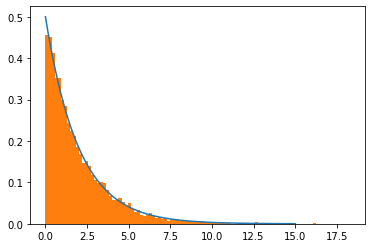

In [13]:
N=10000
A=Exponentielle(0.5, N)
x=np.linspace(0,15,100)
plt.plot(x, 0.5*np.exp(-0.5*x))
plt.hist(A,100, density=True)
plt.show()

## Exercice 7

 1. Simuler avec la fonction ${\tt Exponentielle}$ $N=10\;000$ réalisations de la loi $\mathscr{E}(1)$.
 2. Tracer la fonction de répartition empirique de l'échantillon obtenu et la fonction de répartition théorique de cette loi. Comparer.

#### Solution

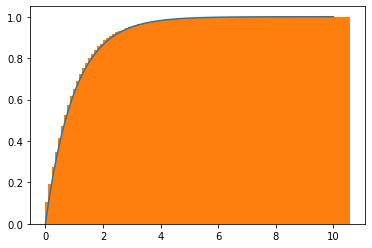

In [14]:
N=10000
A=Exponentielle(1,N)
x=np.linspace(0,10,100)
plt.plot(x,1-np.exp(-x))
plt.hist(A,100, density=True, cumulative=True)
plt.show()

## Exercice 8

Soient $a \in \mathbb{R}_{+}^{*}$ et $\left(X_{1}, \ldots, X_{n}\right)$ une famille de variables aléatoires indépendantes, identiquement distribuées suivant une loi uniforme sur $[0, a]$. On pose :
$$
U=\min \left(X_{1}, \ldots, X_{n}\right) \quad \text { et } \quad V=\max \left(X_{1}, \ldots, X_{n}\right)
$$

  1. Déterminer les lois de $U$ et $V$.
  2. Que renvoie la fonction ${\tt simulation}$ suivante ?

In [15]:
def simulation(a,n):
		nb_sim=10000
		A=a*rd.rand(nb_sim,n)
		return np.max(A,axis=1)

3. Prenons $n=10$ et $a=1$. Comparer graphiquement la qualité de cette simulation.

#### Solution

1. On se contente de considérer $V$ ici, le cas de $U$ est analogue. Pour tout $t\in [0,1]$, on a $P(V\leq t) = P(X_1\leq t, \ldots, X_n\leq t) = P(X_1\leq t)\ldots P(X_n\leq t) = \prod_{k=1}^n t = t^n$. Par ailleurs, si $t<0$, on a $P(V\leq t)=0$, et si $t>1$, on a $P(V\leq t)=1$. Finalement, la fonction de répartition de $U$ s'écrit 
    $$F_V : t \mapsto \left\{\begin{array}{ll} 0 & \text{si } t<0,\\ t^n & \text{si } t\in [0,1],\\ 1 & \text{sinon} \end{array}\right.$$
    On en déduit une densité de $V$, donnée par $f_u : t\mapsto nt^{n-1} 1_{[0,1]}(t)$.

2. La fonction $\verb|simulation|$ renvoie un tableau comprenant $10\,000$ simulations de $V$.

In [16]:
n=10
a=1
V=simulation(a,n)

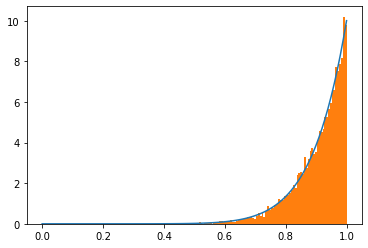

In [17]:
x=np.linspace(0,1,100)
plt.plot(x,n*x**(n-1))
plt.hist(V,100, density=True)
plt.show()

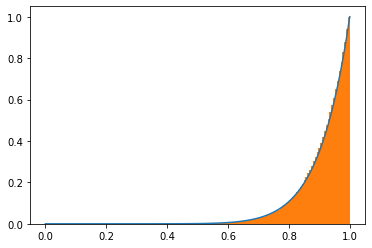

In [18]:
x=np.linspace(0,1,100)
plt.plot(x,x**n)
plt.hist(V,100,cumulative=True, density=True)
plt.show()

## Exercice 9

Soit $\left(X_{k}\right)_{k \geq 1}$ une famille de variables aléatoires mutuellement indépendantes et toutes de même loi. Notons $\overline{X}_{n}=\frac{1}{n} \sum_{k=1}^{n} X_{k}$, et ${\overline{X}_{n}}^{*}=\frac{\overline{X}_{n}-E\left(\overline{X}_{n}\right)}{\sqrt{V\left(\overline{X}_{n}\right)}}$ sa version centrée réduite.

1. On suppose dans cette question que les variables $X_{k}$ suivent toutes la loi $\mathscr{U}([|1,6 |])$.

    1.a. Écrire une fonction ${\tt ncd(n,N)}$ donnant ${\tt N}$ réalisations de la variable $\overline{X}_{n}{ }^{*}$ dans ce cas.
    
    1.b. Comparer l'histogramme des fréquences et la courbe représentative de la densité de la loi $\mathscr{N}(0,1)$, selon les valeurs de $n$. Pour quelles valeurs de $n$ cette simulation semble pertinente?
    
2. Mêmes questions en supposant que les variables $X_{k}$ suivent toutes la loi $\mathscr{E}(1)$.

#### Solution

In [19]:
#1.a.
def simul(n):
    e=7/2
    v=35/(12*n)
    return (1/n*np.sum(rd.randint(1,7,n))-e)/np.sqrt(v)

def ncd(n,N):
    return(np.array([simul(n) for i in range (N)]))

In [20]:
#1.b.
n=10000
N=10000
A=ncd(n,N)
x=np.linspace(-4,4,100)
plt.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi))
plt.hist(A,100,density=True)
plt.show()

In [21]:
#2.
def simulexp(n):
    e=1
    v=1/n
    return (1/n*np.sum(-np.log(rd.rand()-e)/np.sqrt(v)))

def ncd_exp(n,N):
    return(np.array([simul_exp(n) for i in range (N)]))

In [22]:
n=10000
N=10000
A=ncd(n,N)
x=np.linspace(-4,4,100)
plt.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi))
plt.hist(A,100,density=True)
plt.show()

## Exercice 10

Soient $k \in \mathbb{N}^{*}$ et $\lambda>0$.

1. Déterminer la valeur de $r$ pour laquelle 
    $$f_{\lambda}: x \rightarrow\left\{\begin{array}{ll}0 & \text { si } x \leq \lambda \\ \frac{r}{x^{k+1}} & \text { sinon }\end{array}\right.$$
est une densité de probabilité. Si $X$ admet pour densité $f_{\lambda}$, on dit que $X$ suit la loi de Pareto de paramètres $\lambda$ et $k$.

2. Déterminer la fonction de répartition d'une variable suivant la loi de Pareto de paramètres $\lambda$ et $k$.

3. En utilisant la méthode d'inversion, simuler une variable aléatoire suivant une loi de Pareto de paramètres $\lambda$ et $k$.

4. Soient $X_{1}, \ldots, X_{k}$ des variables aléatoires indépendantes suivant toutes la loi uniforme sur $[0,1]$. On pose alors $Y=\dfrac{\lambda}{\max \left(X_{1}, \ldots, X_{k}\right)}$.
    
    4.a. Montrer que $Y$ suit une loi de Pareto de paramètres $\lambda$ et $k$.
    
    4.b. En déduire une autre méthode pour simuler la loi de Pareto.

#### Solution

1. On trouve $r=k \lambda^k$.

2. On trouve $F_\lambda : t \mapsto \left(1-{\left(\frac \lambda t \right)}^k\right) 1_{[\lambda,+\infty[}(t)$.

In [23]:
# Tracé de la fonction de répartition dans un cas particulier
lamb=1
k=3
def F(lamb,t):
    return(1-(lamb/t)**k)
x=np.linspace(lamb,10,100)
plt.plot(x,F(lamb,x))
plt.show()

3. On a $F_\lambda^{-1}(u)=\frac{\lambda}{(1-u)^{\frac 1 k}}$ pour tout $u\geq \lambda$. D'où la simulation suivante, en utilisant la méthode d'inversion.

In [24]:
def simulPareto(lamb,k):
    return lamb/((1-rd.rand())**(1/k))

def SimulPareto(lamb,k,N):
    return np.array([simulPareto(lamb,k) for i in range(N)])

4. Pour $t\in \mathbb{R}$, on cherche à calculer $P(Y>t)$
    - si $t<\lambda$, alors $P(Y>t)=1$ car $\frac{\lambda}{\max(X_1,\ldots, X_k)} \geq \lambda$.
    - si $t\geq \lambda$, alors 
        $$P(Y>t) = P\left(\max(X_1,\ldots,X_k)<\frac \lambda t\right) 
            = P\left(X_1<\frac \lambda t\right)\ldots P\left(X_k<\frac \lambda t\right)
            = {\left(\frac \lambda t\right)}^k.$$
    Ainsi, on a $P(Y\leq t) = 1-P(Y>t) = \left(1-{\left(\frac \lambda t \right)}^k\right) 1_{[\lambda,+\infty[}(t)$, donc $F_Y$ est la fonction de répartition associée à la loi de Pareto de paramètres $\lambda$ et $k$, ce qui conclut. 

In [25]:
#4. Simulation de Y :
def simul2(lamb,k):
    X=rd.rand(k)
    return(lamb/np.max(X))

def Simul2(lamb,k,N):
    return np.array([simul2(lamb,k) for i in range(N)])

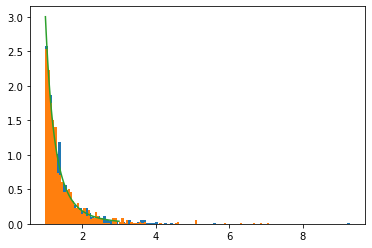

In [26]:
# Histogrammes des fréquences pour les deux simulations.
N=1000
A1=SimulPareto(lamb,k,N)
A2=Simul2(lamb,k,N)

plt.hist(A1,100,density=True)
plt.hist(A2,100,density=True)

x=np.linspace(lamb,lamb+2,100)
plt.plot(x,k*lamb**k/x**(k+1))

plt.show()